<a href="https://colab.research.google.com/github/rajatlamsal00977/Project-1/blob/main/IntegrationProj7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   Rajat Lamsal
*   Bishnu Rijal
*   Pratim khadka




  Instructor: Nicolas Jachob.

  CPSMA 4413 NUMERICAL METHODS -01.

In [3]:

import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
import pandas as pa
import math


%matplotlib inline

lets cosider the original function that we used in our previous project  $f(x) = \cos x$ and investigate the area covered by the first hump,
$$
A = \int_0^\pi/2\cos x\ dx
$$

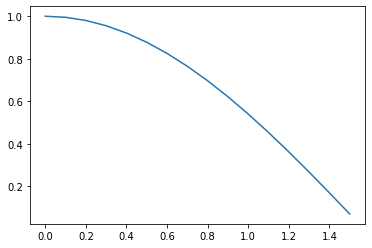

In [6]:
x = np.arange( 0,(3.15/2),.1)  # plotting the graph for cosx at pi/2.
plt.plot(x,np.cos(x))

Now we are going to use the exact integral calulation and compare it with the value we will get using the right hand and left hand Reimann Sum. We will be using the scipy package.

In [7]:
integrate.quad(np.cos ,0,np.pi/2)       # numerical intrigration.

(0.9999999999999999, 1.1102230246251564e-14)

Lets do it by hand!

$$
\begin{align}
A &= \int_0^\pi/2 \ cosx \ dx\\
&= \sin x\vert_0^\pi/2\\
&= \sin\pi/2-\sin 0\\
&= 1
\end{align}
$$

Numerical Integration: Reimann Sum

The three different type of Riemann Sums are a left, center and right hand sum respectively.  We can compute the area under a curve by dividing the area with $n$ little rectangles of equal width, $\Delta x = \frac{b-a}n$, here the 'y' value represents the heigh of the rectangles. sum of area of these n rectangels is the total area covered under the curve which is the integral value of the given function.
$$
A\approx \sum_{i=1}^n f(a+i\Delta x)\Delta x
$$

In [9]:
def deltax(a,b,n):                         #defines delta x
  return (b-a)/n

def riemannSum(function,a,b,n,indicator = 'right'):                   #defines riemann Sum 
  dx = deltax(a,b,n)
  if indicator == 'right':
    start = 1
  elif indicator == 'left':
    start = 0
  elif indicator == 'mid':
    start = 0.5
  sum = 0
  for j in np.arange(start,n+start):
    sum = sum + function(a + j*dx)*dx
  return sum



Now we are going to use the left Reimann Sum and the right Reimann sum given by the next two snippet of code as follows:

In [10]:
riemannSum(np.cos, 0,np.pi/2,10,'left')                #riemann Sum for left hand side

1.076482802694102

In [11]:
riemannSum(np.cos, 0,np.pi/2,10,'right')             #riemann Sum for right hand side.

0.9194031700146126

If we take the average of these two sums then our ans will be close to 0 which is the integration of the function we have taken.

We will now be using the simpson's $\frac 13$.Simpson's $\frac 13$ expression is mentioned below: 
$$
\int_a^b f(x)\ dx
\approx 
\frac{\Delta x}3 
\left[
f(a)
+
4\sum_{odd} f(x_i)
+
2\sum_{even} f(x_i)
+
f(b)
\right]
$$

In [13]:
def simpson(function, a, b , n):              # defines Simpsons rule
  dx = deltax(a,b,n)
  sum = 0
  for i in range(1,n,2): #odds
    sum = sum + 4*function(a+dx*i)
  for i in range(0,n,2): #evens
    sum = sum + 2*function(a+dx*i)
  for i in [a,b]: #endpoints
    sum = sum + function(i)
  sum = dx /3 *sum #multiply by the width/3
  return sum

In [14]:
simpson(np.cos, 0 , np.pi/2,10)              

1.10472314734056